## Open API를 활용한 공공 데이터 수집
- 공공데이터 API 활용

### 공공 데이터
- 공공기관이 생성한 데이터  
- 누구나 무료로 자유롭게 활용 가능  

공공데이터 제공 사이트  
- 공공데이터 포탈 : www.data.go.kr  

공공데이터 제공  
- 회원가입 필수  
- 사용하고자 하는 데이터 사용 신청하고  
- serviceKey 받아서 사용  

### 회원가입 
- 개인별 진행  

사용 데이터 신청  
- 사용하고자 하는 데이터 검색  
- 활용 신청  
- serviceKey 사용  

## 사용 데이터 신청 순서  
- 메뉴에서 [데이터찾기] / [데이터목록]  
- '전국 약국 정보 조회 서비스' 입력 
- 두 번째 XML 형식의 데이터 선택 :  [활용 신청]  클릭  

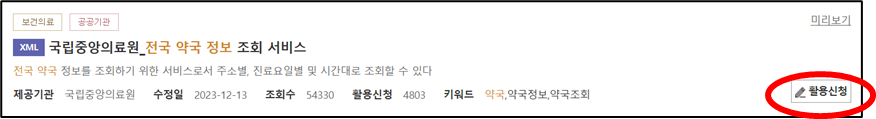

### 활용 신청 시 선택 및 입력 사항  
- 활용 목적 : 참고자료 선택  
- 입력 : 데이터 분석 참고자료  
- 동의합니다 : 체크  
- 인증키 발급 현황 : 인증키 복사해 둘 것  

### [마이페이지]에서 확인  
- [승인] 국립중앙의료원_전국 약국 정보 조회 서비스  클릭하면 [개발계정 상세보기]로 이동
- 참고문서 : NIA-IFT-OpenAPI활용가이드-01.국립중앙의료원_전국약국정보조회서비스.hwp 다운로드 받아서 참고   
- 일반 인증키  
- [활용신청 상세기능정보] 에서 [약국 목록정보 조회] 미리보기 [확인] 누르고
- 서울특별시 강남구 1 삼성약국 NAME 1 10 [미리보기]
  

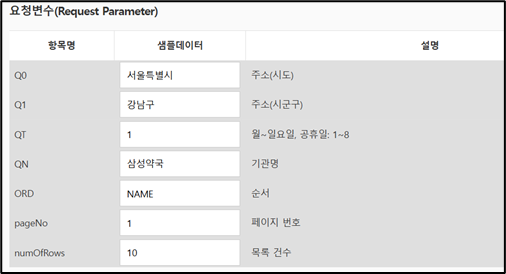

#### 상세 설명 
- endpoint가 제공됨 : base_url이고 조회되는 데이터 종류가 여러 개인 경우, 요청주소도 변경됨
- 요청주소 http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire

#### 국립 중앙의료원 제공 전국 약국 정보 데이터  
- 요청변수가 코드가 아닌 실제 지역명 등 한글 이름 사용해야 함  
- 안글 인코딩 처리 : quote()
- 요청 주소  
    endpoint='http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [21]:
import pandas as pd
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup

In [15]:
# 요청 주소
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'

In [16]:
# 본인의 serviceKey 입력
serviceKey = 'ry3wiibrfwQzUSJCd7jeqtPqKmdasnJANipYjN3PWE6QgWbq9R%2Bs1oKOofHF3go52uYT9jX7HCvCu3W0Yk8reA%3D%3D'

In [17]:
# 파라미터 변수 설정
Q0 = quote("서울특별시") # 광역시도
Q1 = quote("강남구") # 시군구
QT = "1" # 요일: 1~8 월~일, 공휴일: 1이 월요일 시작점
QN = quote("삼성약국") # 약국명에 삼성약국이 포함되는(==이 아니라 contains)
ORD = "NAME" # 정렬기준
pageNo = "1"
numOfRows= "10"

In [18]:
# 파라미터 설정
params = "serviceKey="+serviceKey \
         +"&Q0=" + Q0 \
         +"&Q1=" + Q1 \
         +"&QT=" + QT \
         +"&QN=" + QN \
         +"&ORD=" + ORD \
         +"&pageNo=" + pageNo \
         +"&numOfRows=" + numOfRows

In [19]:
# 요청 url
url = endpoint+params
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=ry3wiibrfwQzUSJCd7jeqtPqKmdasnJANipYjN3PWE6QgWbq9R%2Bs1oKOofHF3go52uYT9jX7HCvCu3W0Yk8reA%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&ORD=NAME&pageNo=1&numOfRows=10'

In [29]:
# 서비스 요청 및 결과 파싱
result = requests.get(url)
# result.content
bs_obj = BeautifulSoup(result.content)
bs_obj.find_all("item")

[<item><dutyaddr>서울특별시 강남구 일원로 53 (일원동) </dutyaddr><dutymapimg>소림빌딩 1층</dutymapimg><dutyname>E-삼성약국</dutyname><dutytel1>02-3412-1254</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>1900</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>1900</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104799</hpid><postcdn1>063</postcdn1><postcdn2>43 </postcdn2><rnum>1</rnum><wgs84lat>37.4892626357407</wgs84lat><wgs84lon>127.081809638604</wgs84lon></item>,
 <item><dutyaddr>서울특별시 강남구 일원로 45, 대훈빌딩 1층 (일원동)</dutyaddr><dutymapimg>대청역 4번출구에서 423m</dutymapimg><dutyname>무지개삼성약국</dutyname><dutytel1>02-2226-5467</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime

In [31]:
# 데이터 추출
items = bs_obj.find_all("item")
for item in items:
    name=item.dutyname.text
    address=item.dutyaddr.text
    print(name, ":", address)

E-삼성약국 : 서울특별시 강남구 일원로 53 (일원동) 
무지개삼성약국 : 서울특별시 강남구 일원로 45, 대훈빌딩 1층 (일원동)
삼성약국 : 서울특별시 강남구 광평로19길 10, 101호 (수서동, 까치마을아파트상가)
이삼성약국 : 서울특별시 강남구 일원로 53, 1층 (일원동, 소림빌딩)


In [34]:
# 파라미터 변수 설정
Q0 = quote("서울특별시") # 광역시도
Q1 = quote("강남구") # 시군구
QT = "1" # 요일: 1~8 월~일, 공휴일: 1이 월요일 시작점
QN = quote("삼성약국") # 약국명에 삼성약국이 포함되는(==이 아니라 contains)
ORD = "NAME" # 정렬기준
pageNo = "1"
numOfRows= "10"

# 파라미터 설정
        #  +"&QN=" + QN \
params = "serviceKey="+serviceKey \
         +"&Q0=" + Q0 \
         +"&Q1=" + Q1 \
         +"&QT=" + QT \
         +"&ORD=" + ORD \
         +"&pageNo=" + pageNo \
         +"&numOfRows=" + numOfRows

In [35]:
url = endpoint+params
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=ry3wiibrfwQzUSJCd7jeqtPqKmdasnJANipYjN3PWE6QgWbq9R%2Bs1oKOofHF3go52uYT9jX7HCvCu3W0Yk8reA%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&QT=1&ORD=NAME&pageNo=1&numOfRows=10'

In [36]:
result=requests.get(url)
bs_obj=BeautifulSoup(result.content)
items= bs_obj.find_all("item")
len(item)

c:\Users\82108\anaconda3\envs\scrap_source\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


21

#### 서울의 모든 약국

In [60]:
# 파라미터 변수 설정
Q0 = quote("서울특별시") # 광역시도
ORD = "NAME" # 정렬기준
pageNo = "1"
numOfRows= "10000"
# 요청 주소
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'

In [61]:
# 파라미터 설정
        #  +"&Q1=" + Q1 \
        #  +"&QT=" + QT \
        #  +"&QN=" + QN \
params = "serviceKey="+serviceKey \
         +"&Q0=" + Q0 \
         +"&ORD=" + ORD \
         +"&pageNo=" + pageNo \
         +"&numOfRows=" + numOfRows

In [62]:
# 요청 url
url = endpoint+params
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=ry3wiibrfwQzUSJCd7jeqtPqKmdasnJANipYjN3PWE6QgWbq9R%2Bs1oKOofHF3go52uYT9jX7HCvCu3W0Yk8reA%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&pageNo=1&numOfRows=10000'

In [63]:
# 서비스 요청 및 결과 파싱
result=requests.get(url)
bs_obj=BeautifulSoup(result.content)
items= bs_obj.find_all("item")
len(items)

5361

In [64]:
items

[<item><dutyaddr>서울특별시 강남구 헌릉로571길 7, 강남레체 1층 101호 (세곡동)</dutyaddr><dutyname>100세건강약국</dutyname><dutytel1>02-445-1460</dutytel1><dutytime1c>2000</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>2000</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>2000</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>2000</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>2000</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1900</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1109587</hpid><postcdn1>063</postcdn1><postcdn2>76 </postcdn2><rnum>1</rnum><wgs84lat>37.4660448664795</wgs84lat><wgs84lon>127.101366881801</wgs84lon></item>,
 <item><dutyaddr>서울특별시 영등포구 양평로 24, (당산동6가)</dutyaddr><dutymapimg>당산역6번출구에서직진일산방향버스정류장앞/9호선8번출구앞</dutymapimg><dutyname>100세약국</dutyname><dutytel1>02-2678-8217</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0830</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0830</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0830</dutytime3s><dutytime4c>190

In [6]:
# 서울시 약국 정보(약국명, 전화, 주소 추출해서) 데이터프레임으로 저장


In [ ]:
# 월요일 밤 9시 이후까지 영업하는 약국 추출 : 2100
# 월요일 영업 <dutyTime1c>
# 약국 수 출력 
# 데이터프레임 저장